In [ ]:
!pip install langchain
!pip install openai
!pip install langchain-community langchain
!pip install langgraph
!pip install -U langchain langchain-openai

In [2]:
import os

os.environ["OPENAI_API_KEY"] = 'OPENAI_API_KEY'
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = 'LANGCHAIN_API_KEY'
os.environ["LANGCHAIN_PROJECT"] = "Langgraph Agents"
os.environ["LANGSMITH_ENDPOINT"] = "https://api.smith.langchain.com"

In [3]:
from langchain.chat_models import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List, Union
from langchain_core.messages import HumanMessage, AIMessage

In [4]:
class MemoryAgent(TypedDict):
  messages: List[Union[HumanMessage,AIMessage]]

In [5]:
llm = ChatOpenAI(model="gpt-4o")

/tmp/ipython-input-5-385969250.py:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model="gpt-4o")


In [6]:
def process(state:MemoryAgent) -> MemoryAgent:
  """This node will solve the request you input"""
  response = llm.invoke(state['messages'])
  state['messages'].append(AIMessage(content=response.content))
  print("AI: ", response.content)

  return state

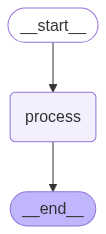

In [7]:
graph = StateGraph(MemoryAgent)

graph.add_node('process',process)

graph.add_edge(START,'process')
graph.add_edge('process',END)

graph.compile()

In [8]:
app = graph.compile()

In [12]:
conversation_history = []

user_input = input("Enter: ")
while user_input != "exit":
    conversation_history.append(HumanMessage(content=user_input))
    print("History: ", conversation_history)
    result = app.invoke({"messages": conversation_history})
    print(result)
    conversation_history = result['messages']
    print("Conversation History:", conversation_history)
    user_input = input("Enter: ")

Enter: hi
History:  [HumanMessage(content='hi', additional_kwargs={}, response_metadata={})]
AI:  Hello! How can I assist you today?
{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={})]}
Conversation History: [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={})]
Enter: my name is Ash
History:  [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='my name is Ash', additional_kwargs={}, response_metadata={})]
AI:  Hi Ash! It's nice to meet you. How can I help you today?
{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist yo